![logo](https://user-images.githubusercontent.com/59526258/124226124-27125b80-db3b-11eb-8ba1-488d88018ebb.png)

> **Copyright (c) 2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program is part of OSRFramework. You can redistribute it and/or modify
<br>it under the terms of the GNU Affero General Public License as published by
<br>the Free Software Foundation, either version 3 of the License, or
<br>(at your option) any later version.
<br>
<br>This program is distributed in the hope that it will be useful,
<br>but WITHOUT ANY WARRANTY; without even the implied warranty of
<br>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
<br>GNU Affero General Public License for more details.
<br>
<br>You should have received a copy of the GNU Affero General Public License
<br>along with this program.  If not, see <http://www.gnu.org/licenses/>.
<br>

# Predicting Intel Stock Price using Linear Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

## View data

Get the latest Intel Stock Price from https://finance.yahoo.com/quote/intc/history/

In [2]:
df = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/INTC.csv")

Read the csv file and display the first 5 rows of your dataframe.

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-10,46.560001,46.759998,46.230000,46.299999,45.137581,21522400
1,2018-09-11,46.000000,46.029999,44.889999,44.930000,43.801979,32455300
2,2018-09-12,44.560001,44.980000,44.060001,44.930000,43.801979,29778700
3,2018-09-13,45.680000,45.849998,45.110001,45.570000,44.425911,18657100
4,2018-09-14,45.779999,45.970001,45.349998,45.540001,44.396664,22998700


Show some of the information about your data, e.g. how many rows, what data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


Plot the graph of Stock Prices against Date by using dataframe.plot() from pandas. Volume is excluded because it has a different scale.

<AxesSubplot:xlabel='Date'>

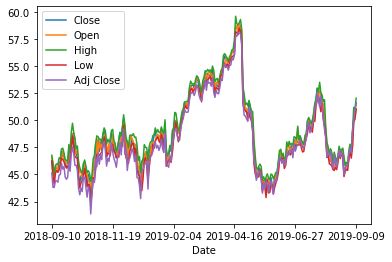

In [5]:
df.plot(x="Date",y=["Close","Open","High","Low","Adj Close"])

## Prepare data

Since various stock prices and Volume data points has different scales, if you want to plot the graph out and visualize, we will use **matplotlib** to plot.

In [6]:
# Define Date as the X-axis and convert dataframe to a numpy array
print(type(df))
x = df["Date"].values
print(type(x))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [7]:
# Print out the values and check the size
# print(x)
print(len(x))

251


In [8]:
# define the first y-axis which is all stock prices by dropping/removing the Date(x-axis) and Volume(data with different scale)
df2 = df.drop(columns=["Date","Volume"])
df2.head()
y1 = df2.values
# print(y1)
print(len(y1))

251


In [9]:
y2 = df["Volume"].values
# print(y2)
print(len(y2))

251


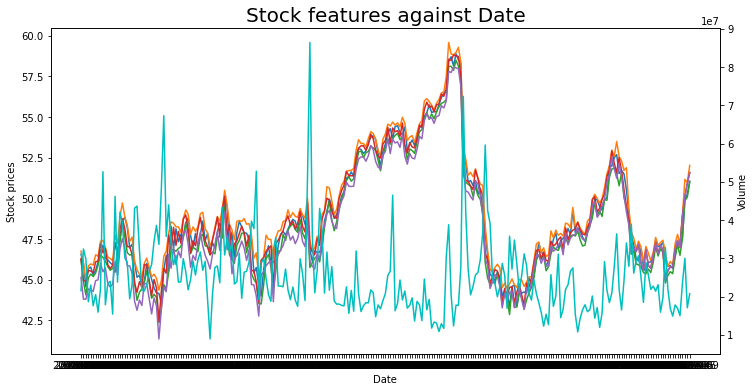

In [10]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.plot(x,y1)
plt.title('Stock features against Date',fontsize=20)
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock prices')
ax2 = ax1.twinx()
ax2.set_ylabel('Volume')
ax2.plot(x,y2,'c')

When creating the Linear Regression Model, "Date" can be considered as a contributing factor or feature in training the model. 

In plain sight, "Date" is just a string, but we can convert it directly into a timestamp by using pandas. 

From the timestamp data-type, we can extract more meaningful features to be used to train our model, e.g. month, quarter, week.

In [11]:
df["Date"] = pd.to_datetime(df.Date,format='%Y-%m-%d')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


Scikit-learn will not accept String or Timestamp as the data, so we will need to convert the "Date" into a much simplier data that scikitlearn can accept.

In [13]:
newdate = df["Date"]

df4 = pd.DataFrame({"year": newdate.dt.year,
              "month": newdate.dt.month,
              "day": newdate.dt.day,
              "hour": newdate.dt.hour,
              "dayofyear": newdate.dt.dayofyear,
              "week": newdate.dt.week,
              "weekofyear": newdate.dt.weekofyear,
              "dayofweek": newdate.dt.dayofweek,
              "weekday": newdate.dt.weekday,
              "quarter": newdate.dt.quarter,
             })


c:\anaconda\envs\machine\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
c:\anaconda\envs\machine\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [14]:
df3 = df.drop(columns=["Date"])
df5 = pd.concat([df4,df3],axis=1)
df5.head()

,year,month,day,hour,dayofyear,week,weekofyear,dayofweek,weekday,quarter,Open,High,Low,Close,Adj Close,Volume
0,2018,9,10,0,253,37,37,0,0,3,46.560001,46.759998,46.230000,46.299999,45.137581,21522400
1,2018,9,11,0,254,37,37,1,1,3,46.000000,46.029999,44.889999,44.930000,43.801979,32455300
2,2018,9,12,0,255,37,37,2,2,3,44.560001,44.980000,44.060001,44.930000,43.801979,29778700
3,2018,9,13,0,256,37,37,3,3,3,45.680000,45.849998,45.110001,45.570000,44.425911,18657100
4,2018,9,14,0,257,37,37,4,4,3,45.779999,45.970001,45.349998,45.540001,44.396664,22998700


Our data is now ready for model training.

In [15]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        251 non-null    int64  
 1   month       251 non-null    int64  
 2   day         251 non-null    int64  
 3   hour        251 non-null    int64  
 4   dayofyear   251 non-null    int64  
 5   week        251 non-null    int64  
 6   weekofyear  251 non-null    int64  
 7   dayofweek   251 non-null    int64  
 8   weekday     251 non-null    int64  
 9   quarter     251 non-null    int64  
 10  Open        251 non-null    float64
 11  High        251 non-null    float64
 12  Low         251 non-null    float64
 13  Close       251 non-null    float64
 14  Adj Close   251 non-null    float64
 15  Volume      251 non-null    int64  
dtypes: float64(5), int64(11)
memory usage: 31.5 KB


Split the data by using this way instead of using train_test_split because we are treating our stock data as a time series data

In [16]:
train = df5[:200]
test = df5[200:]

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        200 non-null    int64  
 1   month       200 non-null    int64  
 2   day         200 non-null    int64  
 3   hour        200 non-null    int64  
 4   dayofyear   200 non-null    int64  
 5   week        200 non-null    int64  
 6   weekofyear  200 non-null    int64  
 7   dayofweek   200 non-null    int64  
 8   weekday     200 non-null    int64  
 9   quarter     200 non-null    int64  
 10  Open        200 non-null    float64
 11  High        200 non-null    float64
 12  Low         200 non-null    float64
 13  Close       200 non-null    float64
 14  Adj Close   200 non-null    float64
 15  Volume      200 non-null    int64  
dtypes: float64(5), int64(11)
memory usage: 25.1 KB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 200 to 250
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        51 non-null     int64  
 1   month       51 non-null     int64  
 2   day         51 non-null     int64  
 3   hour        51 non-null     int64  
 4   dayofyear   51 non-null     int64  
 5   week        51 non-null     int64  
 6   weekofyear  51 non-null     int64  
 7   dayofweek   51 non-null     int64  
 8   weekday     51 non-null     int64  
 9   quarter     51 non-null     int64  
 10  Open        51 non-null     float64
 11  High        51 non-null     float64
 12  Low         51 non-null     float64
 13  Close       51 non-null     float64
 14  Adj Close   51 non-null     float64
 15  Volume      51 non-null     int64  
dtypes: float64(5), int64(11)
memory usage: 6.5 KB


In [19]:
X_train = train.drop("Close",axis=1)
y_train = train["Close"]
X_test = test.drop("Close",axis=1)
y_test = test["Close"]

## Train model

In [20]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

There are 15 coefficients because we have 15 features.

In [21]:
print(model.coef_)
print(len(model.coef_))

[-1.21623421e+00  6.62642249e-01  2.42293885e-02 -5.71764858e-15
 -2.63146980e-02 -8.27803882e-04 -8.27803882e-04 -4.81336664e-04
 -4.81336664e-04  1.16100807e-01 -4.26645836e-02  8.21747086e-02
  5.46547438e-03  9.69176032e-01 -2.97479374e-10]
15


## Evaluate

In [22]:
predictions = model.predict(X_test)

In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.05985087510990894
MSE: 0.00504970229892639
RMSE: 0.07106125736944421


The evaluation metrics are low which shows that the model is generalizing the data well

In [24]:
test.insert(16,"Predictions",predictions)

In [25]:
test[["Close","Predictions"]].tail()

,Close,Predictions
246,46.980000,46.893889
247,48.919998,48.897602
248,50.099998,50.130276
249,50.919998,50.898453
250,51.590000,51.598743


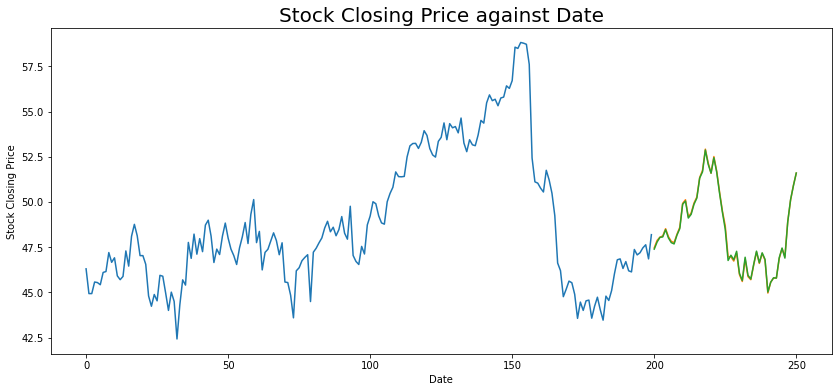

In [26]:
fig = plt.figure(figsize=(14, 6))
plt.title("Stock Closing Price against Date",fontsize=20)
plt.xlabel("Date")
plt.ylabel("Stock Closing Price")
plt.plot(train["Close"])
plt.plot(test[["Close","Predictions"]])


In [27]:
model.score(X_test, y_test)

0.9988429450746144

Seems like the model is doing a very good job at predicting the stock price. It could be due to that we are using a small dataset with low number of features.

Let us try to build another linear regression model with the same dataset, but this time, let us use the "date" as the only feature.

## Train model using date only

In [28]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        251 non-null    int64  
 1   month       251 non-null    int64  
 2   day         251 non-null    int64  
 3   hour        251 non-null    int64  
 4   dayofyear   251 non-null    int64  
 5   week        251 non-null    int64  
 6   weekofyear  251 non-null    int64  
 7   dayofweek   251 non-null    int64  
 8   weekday     251 non-null    int64  
 9   quarter     251 non-null    int64  
 10  Open        251 non-null    float64
 11  High        251 non-null    float64
 12  Low         251 non-null    float64
 13  Close       251 non-null    float64
 14  Adj Close   251 non-null    float64
 15  Volume      251 non-null    int64  
dtypes: float64(5), int64(11)
memory usage: 31.5 KB


In [29]:
train = df5[:200]
test = df5[200:]

In [30]:
X_train = train.drop(["Close","Open","High","Low","Adj Close","Volume"],axis=1)
y_train = train["Close"]
X_test = test.drop(["Close","Open","High","Low","Adj Close","Volume"],axis=1)
y_test = test["Close"]

In [31]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
print(model.coef_)
print(len(model.coef_))

[-1.14424323e+00  3.62399513e+01  1.18257173e+00  2.81552559e-13
 -1.21377433e+00 -1.53524349e-02 -1.53524349e-02 -2.65088625e-02
 -2.65088625e-02  7.07019270e-01]
10


### Understanding coefficients
The coefficients are the mathematical representations of the features to the label. In this example, there are ten coefficients. Every value corresponds to each feature in the data. The value can be negative or positive.

The sign(positive or negative) of the coefficient indicates that correlation between independent and dependent variable.
- Independent variable: Feature(One column)
- Dependent variable: target

All coefficient values lie between -1 and 1. 

#### Towards +1
As the value of the independent variable increase, the value of the dependent variable tends to increase.

#### Towards -1
As the value of the independent variable decrease(more negative), the value of the dependent variable tends to increase.

#### Close to zero
The value that is close to 0 indicates that the independent variable has no significant contribution to the dependent variable.

## Evaluate

In [33]:
predictions = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.6052635062081577
MSE: 3.987310343448145
RMSE: 1.9968250658102589


Compared to the model before, the metric produce higher value which indicates the value has higher error than the previous model.

The previous model works better.

In [34]:
test.insert(11,"Predictions",predictions)
test[["Close","Predictions"]].tail()

,Close,Predictions
246,46.980000,46.558332
247,48.919998,46.474112
248,50.099998,46.389892
249,50.919998,46.305672
250,51.590000,46.393430


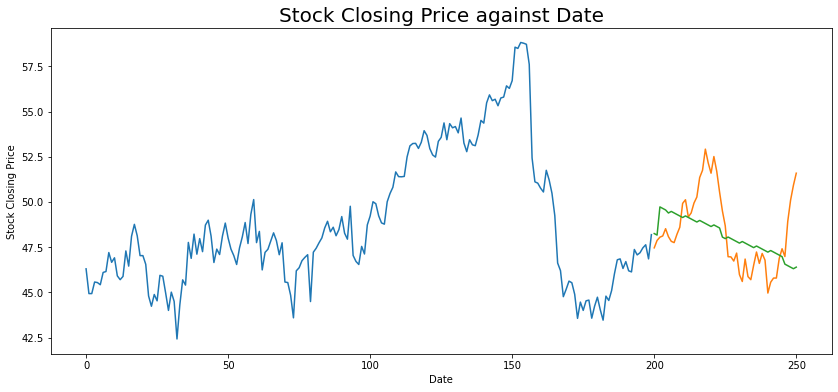

In [35]:
fig = plt.figure(figsize=(14, 6))
plt.title("Stock Closing Price against Date",fontsize=20)
plt.xlabel("Date")
plt.ylabel("Stock Closing Price")
plt.plot(train["Close"])
plt.plot(test[["Close","Predictions"]])

In [36]:
model.score(X_test, y_test)

0.08637444371549019

As you can see, the prediction is very bad when you predict the stock price solely based on the date.